# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [381]:
#Import all the necessary modules
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [382]:
df = pd.read_csv("G:\Residency 3\Residency_3_Internal_Lab\pima-indians-diabetes+(3).csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [383]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [385]:
df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [386]:
pima_df = df.iloc[:,1:8]
#pima_df.head(2)

In [387]:
pima_df.isin([0]).any()

Plas     True
Pres     True
skin     True
test     True
mass     True
pedi    False
age     False
dtype: bool

In [388]:
#pima_df['Plas'][pima_df['Plas'] == 0].count() # 5 rows
#pima_df['Pres'][pima_df['Pres'] == 0].count() # 35 rows
#pima_df['skin'][pima_df['skin'] == 0].count() # 227
#pima_df['test'][pima_df['test'] == 0].count() #374
#pima_df['mass'][pima_df['mass'] == 0].count() #11
#pima_df['pedi'][pima_df['pedi'] == 0].count() #0
#pima_df['age'][pima_df['age'] == 0].count() #0

pima_df[pima_df == 0].count().sum()

652

In [389]:
pima_df[pima_df == np.nan].count().sum()

0

In [390]:
pima_df.replace( to_replace=0,value=np.nan,inplace=True)

In [391]:
pima_df = pima_df.fillna(pima_df.median())

In [392]:
# We can also use Imputer function
#from sklearn.impute import SimpleImputer
#pima_df = SimpleImputer(missing_values=np.nan, strategy='median')

In [393]:
# check missing values again

#pima_df[pima_df == np.nan].count().sum()
#pima_df[pima_df == 0].count().sum()

In [394]:
#Adding "Preg" & "Class" in new copy df
pima_df['Preg'] = df['Preg']
pima_df['class'] = df['class']
pima_df.head(3)


,Plas,Pres,skin,test,mass,pedi,age,Preg,class
0,148.0,72.0,35.0,125.0,33.6,0.627,50,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32,8,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [395]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
test,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
mass,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [396]:
df.groupby(['class']).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [397]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

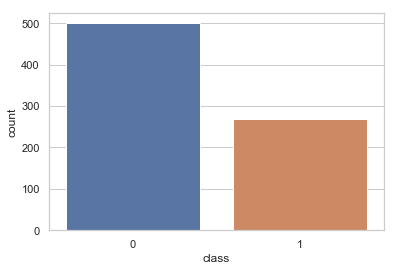

In [398]:
sns.countplot(x="class", data=pima_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

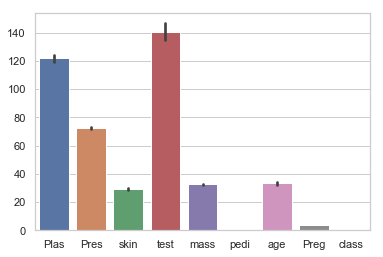

In [399]:
sns.set(style="whitegrid")
ax = sns.barplot(data=pima_df)

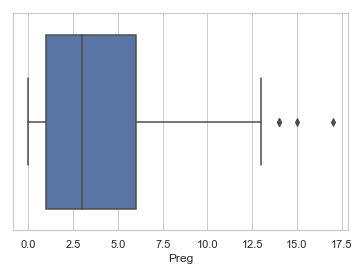

In [400]:
sns.boxplot(x = 'Preg',data =pima_df)

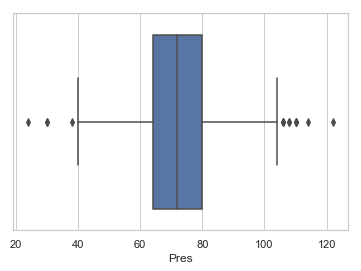

In [401]:
sns.boxplot(x = 'Pres',data =pima_df)

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\Paridhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Paridhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


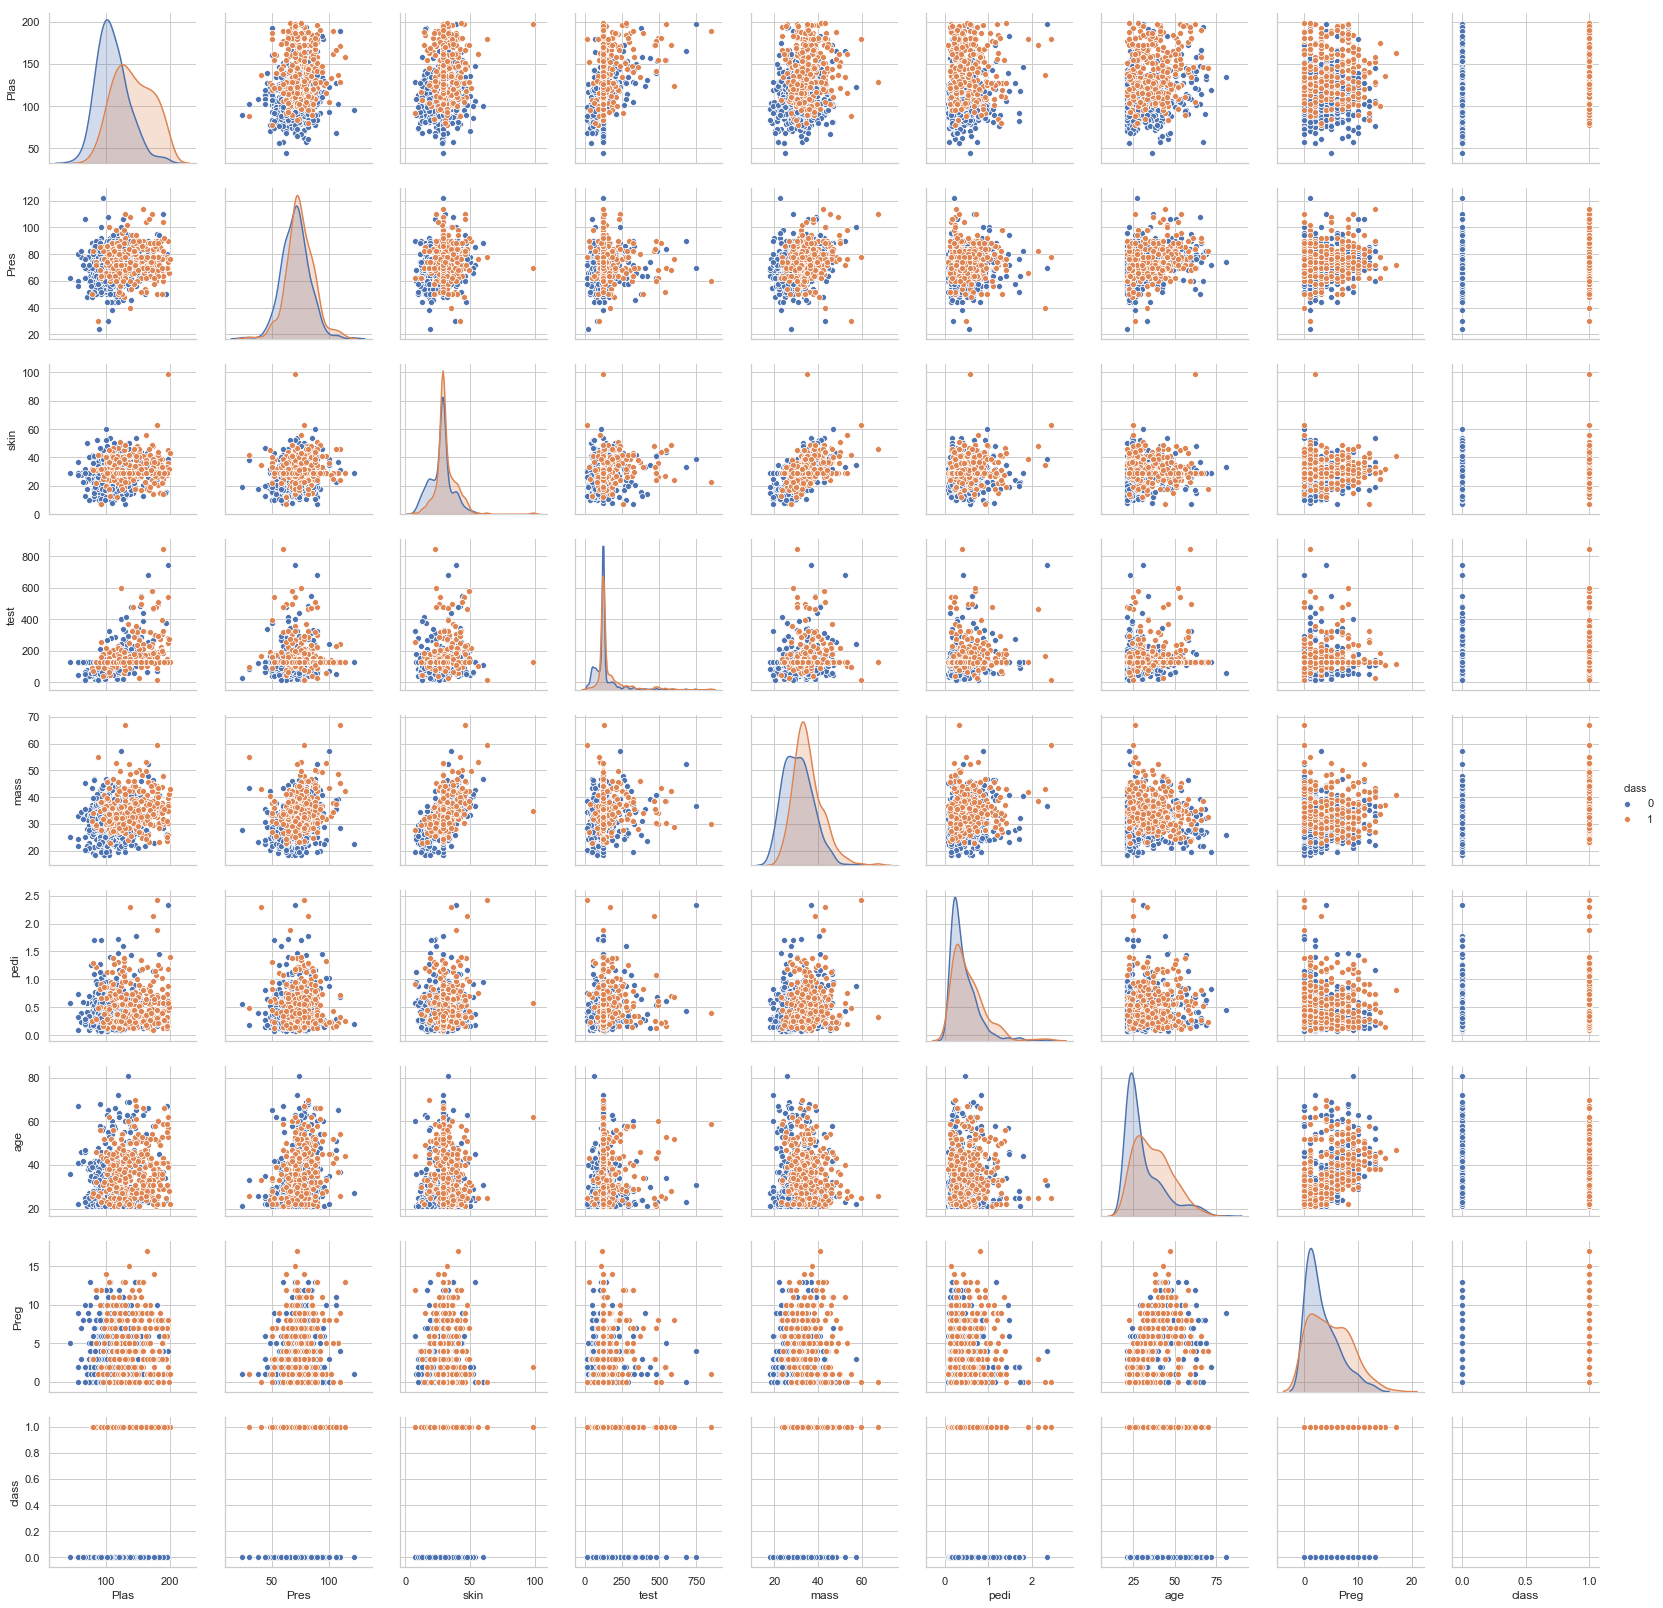

In [402]:
sns.pairplot(pima_df, hue = "class")

In [403]:
pima_df.corr(method ='pearson') 

,Plas,Pres,skin,test,mass,pedi,age,Preg,class
Plas,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.128213,0.492782
Pres,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.208615,0.165723
skin,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.081770,0.214873
test,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.025047,0.203790
mass,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.021559,0.312038
pedi,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,-0.033523,0.173844
age,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.544341,0.238356
Preg,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,1.000000,0.221898
class,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,0.221898,1.000000


(plas, pres, skin, and mass) looks normally distributed while (preg, test, pedi, age)
looks like they may have an exponential distribution.
Age should probably have a normal distribution, some skewness in the distribution may be added during data collection.

There is no obvious relationship between age and onset of diabetes.
There is no obvious relationship between pedi function and onset of diabetes.

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [404]:
X = np.array(pima_df.iloc[:,0:8])
y = np.array(pima_df.iloc[:,8])

In [405]:
#test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [406]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state= 10 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [407]:
dt_model.score(X_train , y_train)

1.0

In [408]:
dt_model.score(X_test , y_test)

0.7012987012987013

In [409]:
y_predict = dt_model.predict(X_test)

In [410]:
print(metrics.confusion_matrix(y_test, y_predict))

[[109  38]
 [ 31  53]]


Print the feature importance of the decision model - Optional

In [411]:
train_char_label = ['No', 'Yes']
#credit_tree_regularized = open('credit_tree_regularized.dot','w')
#dot_data = tree.export_graphviz(dt_model, out_file= credit_tree_regularized , feature_names = list(X_train),class_names = list(train_char_label))

#credit_tree_regularized.close()
#dt_model.feature_importances_
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = pima_df.iloc[:,0:8].columns))

           Imp
Plas  0.271629
Pres  0.090218
skin  0.065678
test  0.092898
mass  0.184898
pedi  0.117991
age   0.139221
Preg  0.037467
